## Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил: Хайкин Глеб

### Общая информация

__Дата выдачи:__ 08.02.2020

__Дедлайн:__ 18.02.2020 23:59

### О задании

Практика в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждую задачу сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) дается 0.5 бонусных балла. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

Так как российское округление отлично от западных стандартов, определим функцию округления:
__NB! спросить про оператор__

In [2]:
def rus_round(x):
    if x % 1 >= 0.5:
        return int(x) + 1
    return int(x)

Теперь решим само задание.

In [3]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return rus_round(np.sum(weights * marks))

In [4]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [5]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

Если же в д/з нельзя — даже в вспомогательных функциях — использовать оператор `if`, то решение будет следующим
(хотя оно не соответствует нашей системе):

In [6]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return round(np.sum(weights * marks))

In [7]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [8]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [9]:
def change_array(array: np.array, number: int) -> np.array:
    i = np.arange(0, len(array), 3)
    array[i] = number
    return array

In [10]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [11]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [12]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    return np.where(abs(array1 - array2) <= precision)[0]

In [13]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [14]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [15]:
def block_matrix(block: np.array) -> np.array:
    return np.vstack((np.concatenate((block, block), axis=1), 
                      np.concatenate((block, block), axis=1)))

In [16]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [17]:
def diag_prod(matrix: np.array) -> int:
    d = np.diagonal(matrix)
    d = np.where(d == 0, 1, d)
    return np.prod(d)

In [18]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._ __NB!!!! спросить про случай деления на ноль__.

In [19]:
def normalize(matrix: np.array) -> np.array:
    mu = np.mean(matrix, axis=0)
    sigma = np.std(matrix, axis=0)
    return (matrix - mu) / sigma

In [20]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
    )

In [21]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
    )

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [22]:
def antiderivative(coefs: np.array) -> np.array:
    powers = np.arange(0, len(coefs))[::-1] # степени полинома
    a = coefs / (powers + 1) 
    return np.append(a, 0)

In [23]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [24]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [25]:
def make_symmetric(matrix: np.array) -> np.array:
    N = np.shape(matrix)[0]
    a = np.triu_indices(N)
    matrix_new = matrix.copy()
    matrix_new.T[a] = matrix[a]
    return matrix_new

In [26]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [27]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [28]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    x = np.arange(a, b + 1)
    x_new = np.repeat(x, m) # повторяем элементы m раз 
    return x_new.reshape(m, len(x), order='F') # меняем форму матрицы

In [29]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [30]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

Проверить функцию meshgrid

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [31]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    numerator = np.sum(vec1 * vec2)
    denominator = np.sqrt(np.sum(vec1 ** 2)) * np.sqrt(np.sum(vec2 ** 2))
    return numerator / denominator

In [32]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [33]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [109]:
df = pd.read_csv("train.csv", delimiter=",")
df.shape

(891, 12)

Как видно, размер таблицы — 891 на 12, то есть в нашей выборке 891 объект и 11 признаков. Теперь выведем первые 5 и последние 5 строк.

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

#### Признаки
1. Survived: бинарный (0 — нет, 1 — да).
2. Pclass (Ticket class): порядковый (1 — "бизнес", 2 — "средний", 3 — "эконом").
3. Name — не признак.
4. Sex — категориальный (male, female).
5. Age — вещественный.
6. SibSp (# of siblings/spouses aboard the Titanic) — порядковый__????__.
7. Parch (# of parents / children aboard the Titanic) — порядковый__????__.
8. Ticket — не признак__????__ .
9. Fare — вещественный__????__.
10. Cabin — __????__
11. Embarked (Port of Embarkation) — категориальный (C — Cherbourg, Q — Queenstown, S — Southampton).

#### Задачи
1. __Регрессия__:
2. __Классификация__:
3. __Кластеризация__:

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [112]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [113]:
df[df.columns[4]]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [114]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [115]:
pas_survived = df["Survived"].value_counts()
pas_survived

0    549
1    342
Name: Survived, dtype: int64

Тогда доля выживших:

In [116]:
round(pas_survived[1] / np.sum(pas_survived), 2)

0.38

Доля мужчин среди выживших:

In [117]:
male_survived = df["Survived"][df["Sex"] == "male"].value_counts()
male_survived

0    468
1    109
Name: Survived, dtype: int64

In [118]:
round(male_survived[1] / np.sum(male_survived), 2)

0.19

Доля женщин среди выживших:

In [119]:
female_survived = df["Survived"][df["Sex"] == "female"].value_counts()
female_survived

1    233
0     81
Name: Survived, dtype: int64

In [120]:
round(female_survived[1] / np.sum(female_survived), 2)

0.74

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [121]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Следовательно, самый многолюдный класс — это эконом.

In [122]:
df["Sex"][df["Pclass"] == 3].value_counts()

male      347
female    144
Name: Sex, dtype: int64

Как видно, мужчин в эконом классе было больше.

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

#### 1) Минимальная, средняя и максимальная сумма за проезд.

In [123]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Отсюда видим, что

$\text{Fare}_{min} = \$0$

$\text{Fare}_{mean} \approx \$32.2$

$\text{Fare}_{max} \approx \$512.32$

Или

In [124]:
df["Fare"].min()

0.0

In [125]:
df["Fare"].mean()

32.2042079685746

In [126]:
df["Fare"].max()

512.3292

#### 2) 

In [127]:
df["Fare"][df["Embarked"] == "S"].describe()

count    644.000000
mean      27.079812
std       35.887993
min        0.000000
25%        8.050000
50%       13.000000
75%       27.900000
max      263.000000
Name: Fare, dtype: float64

$\text{Fare_S}_{min} = \$0$

$\text{Fare_S}_{mean} \approx \$ 27.08$

$\text{Fare_S}_{max} \approx \$ 263$

Или

In [128]:
df["Fare"][df["Embarked"] == "S"].min()

0.0

In [129]:
df["Fare"][df["Embarked"] == "S"].mean()

27.07981180124218

In [130]:
df["Fare"][df["Embarked"] == "S"].max()

263.0

#### 3) Гистограмма

__Cherbourg__:

In [131]:
cherbourg_fare = df["Fare"][df["Embarked"] == "C"]
cherbourg_fare

1      71.2833
9      30.0708
19      7.2250
26      7.2250
30     27.7208
        ...   
866    13.8583
874    24.0000
875     7.2250
879    83.1583
889    30.0000
Name: Fare, Length: 168, dtype: float64

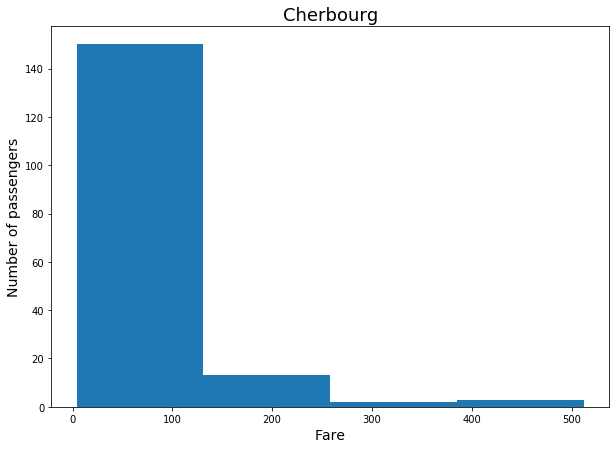

In [132]:
plt.figure(figsize=(10,7))
plt.hist(cherbourg_fare, bins=4)
plt.xlabel("Fare", fontsize=14)  
plt.ylabel("Number of passengers", fontsize=14)
plt.title("Cherbourg", fontsize=18)
plt.show()

__Queenstown__:

In [133]:
queenstown_fare = df["Fare"][df["Embarked"] == "Q"]
queenstown_fare

5       8.4583
16     29.1250
22      8.0292
28      7.8792
32      7.7500
        ...   
790     7.7500
825     6.9500
828     7.7500
885    29.1250
890     7.7500
Name: Fare, Length: 77, dtype: float64

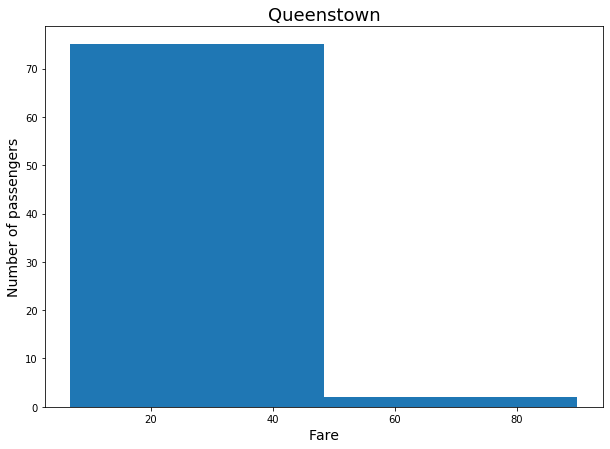

In [134]:
plt.figure(figsize=(10,7))
plt.hist(queenstown_fare, bins=2)
plt.xlabel("Fare", fontsize=14)  
plt.ylabel("Number of passengers", fontsize=14)
plt.title("Queenstown", fontsize=18)
plt.show()

__Southampton__:

In [135]:
southampton_fare = df["Fare"][df["Embarked"] == "S"]
southampton_fare

0       7.2500
2       7.9250
3      53.1000
4       8.0500
6      51.8625
        ...   
883    10.5000
884     7.0500
886    13.0000
887    30.0000
888    23.4500
Name: Fare, Length: 644, dtype: float64

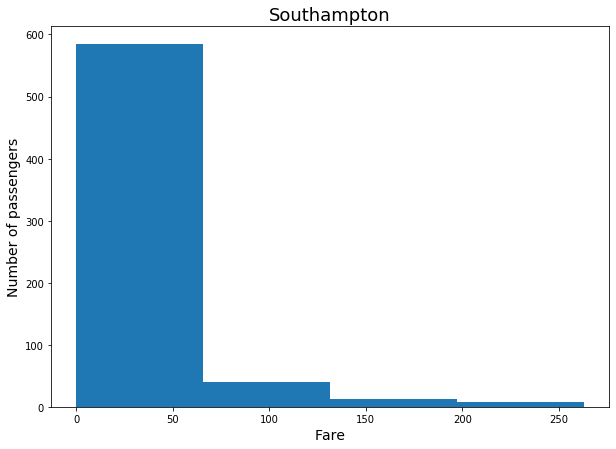

In [136]:
plt.figure(figsize=(10,7))
plt.hist(southampton_fare, bins=4)
plt.xlabel("Fare", fontsize=14)  
plt.ylabel("Number of passengers", fontsize=14)
plt.title("Southampton", fontsize=18)
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Нет, не все. Для анализа нам не нужно знать имя пассажира, номер его билета. Как окажется далее, также нам не нужен номера кабины. 

In [137]:
df = df.drop(['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

Посмотрим, есть ли проспуски:

In [138]:
df.isnull().any().any()

True

Как видим, они есть. Посмотрим, в каких столбцах находятся пропуски.

In [139]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Узнаем, сколько пропусков в столбце Age:

In [140]:
df["Age"].isnull().value_counts()[True]

177

Cabin:

In [141]:
df["Cabin"].isnull().value_counts()[True]

687

Скорее всего, признак cabin тоже не нужен, ибо слишком мало данных по нему + он бесполезен. Удаляем этот столбец.

In [142]:
df = df.drop(['Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


Embarked:

In [143]:
df["Embarked"].isnull().value_counts()[True]

2

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

### Признак `Age`

Для столбца `Age` можно сделать следующее:
1. Заполнить все пропуски одним значением, а именно средним значением $\mu$.
2. Заполнить все пропуски, опираясь на нормальное распределение с параметрами $\mu$ и $\sigma^2$.

Выявим эти параметы по имеющимся у нас данным пассажиров.

In [144]:
passengers_with_age = df[df["Age"].isnull() == False]
stats = passengers_with_age["Age"].describe()
stats

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

$$
\mu \approx 29.7,
$$ 

$$
\sigma^2 \approx 14.53^2.
$$

In [145]:
mu = stats[1]
sigma = stats[2]

#### 1 способ

In [146]:
df_1 = df.copy()
df_1["Age"] = df_1["Age"].fillna(round(mu)) # округлим средние для простоты

#### 2 способ

In [147]:
passengers_without_age = df[df["Age"].isnull() == True]
index = np.array(passengers_without_age[passengers_without_age.columns[0]]) - 1
df_2 = df.copy()

In [148]:
import random as rnd
mu = stats[1]
sigma = stats[2]
d = dict()

for i in index:
    d[i] = round(rnd.gauss(mu, sigma))

for j in d:
    if d[j] <= 0 or d[j] > 80:
        d[j] = round(mu) # если посредством нормального распределения сгенерировались значения, не входящие 
                         # в размах нашей выборки, заменяем их на среднее

In [149]:
df_2["Age"] = df_2["Age"].fillna(d)

### Признак `Embarked`

Можно сделать следущее:
1. Проигнорировать объекты, если они незначительны.
2. Воспользоваться моделью наподобие kNN, дабы спрогнозировать место отправления. К примеру, по стоимости билета. 
3. Сохастически выбрать место отправления пассажиров, то есть распределить по имеющимся категориям.
4. Заполнить пропуски какой-то одной категорией.

Имплеминтируем 4 пункт.

In [150]:
no_data_embarked = df[df["Embarked"].isnull() == True]
index = np.array(no_data_embarked[no_data_embarked.columns[0]]) - 1
d = dict()

number = rnd.randint(1, 3)
    
if number == 1:
    category = "C"
elif number == 2:
    category = "Q"
else:
    category = "S" 
        
for i in index:
    d[i] = category

In [151]:
df_1["Embarked"] = df_1["Embarked"].fillna(d)

In [152]:
df_2["Embarked"] = df_2["Embarked"].fillna(d)

Теперь проверим, остались ли у нас пропуски. Далее будем использовать __две таблицы__: `df_1` и `df_2`

In [153]:
df_1.isnull().any().any()

False

In [154]:
df_2.isnull().any().any()

False

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

### `df_1`

Рассчитаем корреляцию.

In [155]:
fare_1 = df_1["Fare"]
age_1 = df_1["Age"]
np.corrcoef(age, fare)[0, 1]

0.09456604640366342

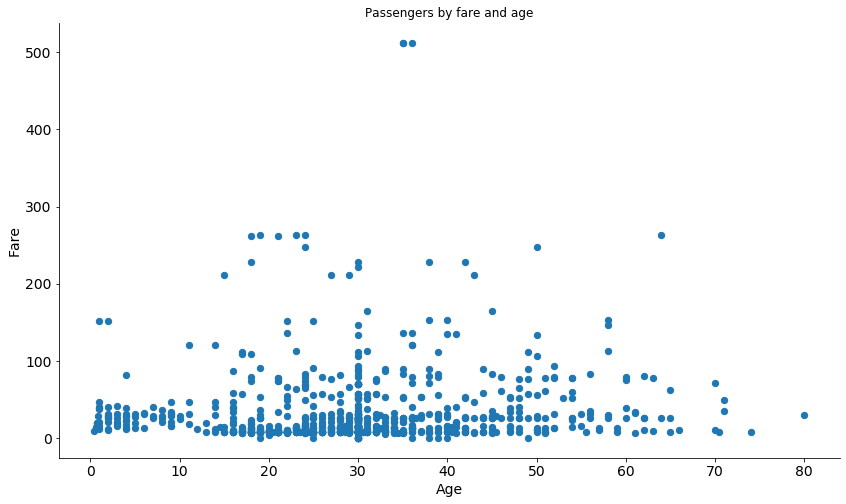

In [156]:
fig = plt.figure(figsize=(14, 8))

# Удаляем лишние границы для красоты
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.title("Passengers by fare and age")
plt.xlabel("Age", fontsize=14)  
plt.ylabel("Fare", fontsize=14)

plt.scatter(age_1, fare_1, s=40, cmap='viridis')

### `df_2`

In [159]:
fare_2 = df_2["Fare"]
age_2 = df_2["Age"]
np.corrcoef(fare_2, age_2)[0, 1]

0.10180982598173201

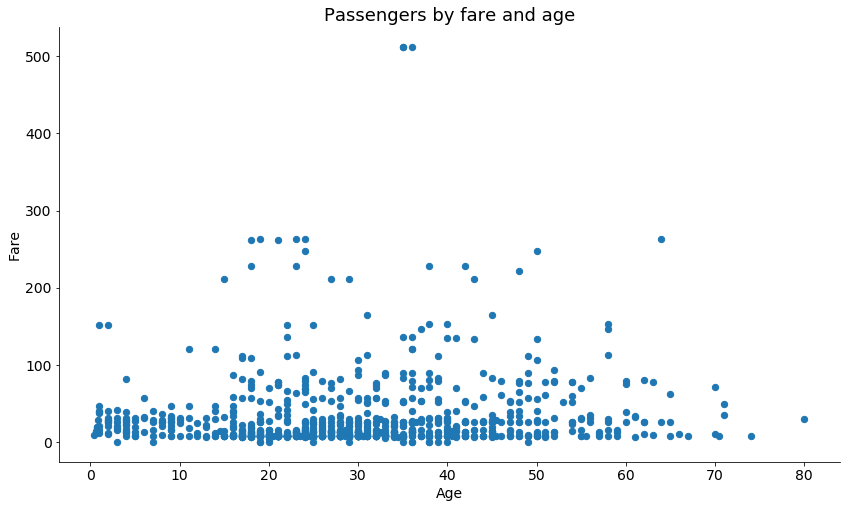

In [201]:
fig = plt.figure(figsize=(14, 8))

# Удаляем лишние границы для красоты
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.title("Passengers by fare and age", fontsize=18)
plt.xlabel("Age", fontsize=14)  
plt.ylabel("Fare", fontsize=14)

plt.scatter(age, fare, s=40, cmap='viridis')

#### Вывод:
В `df_1` и `df_2` цена за билет и возраст пассажира слабо коррелируют друг с другом. 

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

__1)__ Так как возраст здесь не фигурирует, нам без разницы, какую таблицу использовать (`df_1` или `df_2`).

Будем подразумевать под дорогими те билеты, стоимость которых находится в 75–100 перцентилях.

In [161]:
df_1["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

То есть чья стоимость выше $\$31$. 

In [180]:
exp_fare = df_1["Survived"][df_1["Fare"] >= 31]
cheap_fare = df_1["Survived"][df_1["Fare"] < 31]

exp_fare_survived = np.sum(exp_fare) / exp_fare.shape[0] # доля выживших среди относительно дорогих билетов
cheap_fare_survived = np.sum(cheap_fare) / cheap_fare.shape[0] # доля выживших среди относительно дорогих билетов

Действительно, чаще выживали пассажиры с более дорогими билетами.

In [183]:
exp_fare_survived > cheap_fare_survived

True

__2)__ Так как возраст здесь не фигурирует, нам без разницы, какую таблицу использовать (`df_1` или `df_2`).

In [199]:
pclass_1 = df_1["Survived"][df_1["Pclass"] == 1]
pclass_2 = df_1["Survived"][df_1["Pclass"] == 2]
pclass_3 = df_1["Survived"][df_1["Pclass"] == 3]

pclass_1_survived = np.sum(pclass_1) / pclass_1.shape[0]
pclass_2_survived = np.sum(pclass_2) / pclass_2.shape[0]
pclass_3_survived = np.sum(pclass_3) / pclass_3.shape[0]

pclass_1_survived > pclass_2_survived > pclass_3_survived

True

Да. Чем выше класс, тем больше шанс выжить.

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [ ]:
# your code here

### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [ ]:
# your code here

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

In [ ]:
# your code here

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [ ]:
# your code here

# Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

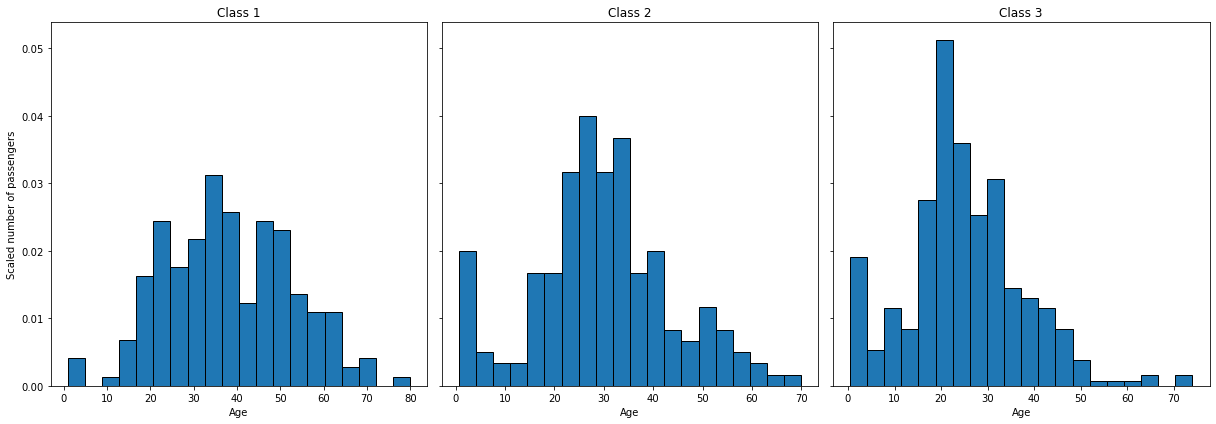

In [34]:
# В итоге ваш график должен получиться примерно таким:

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

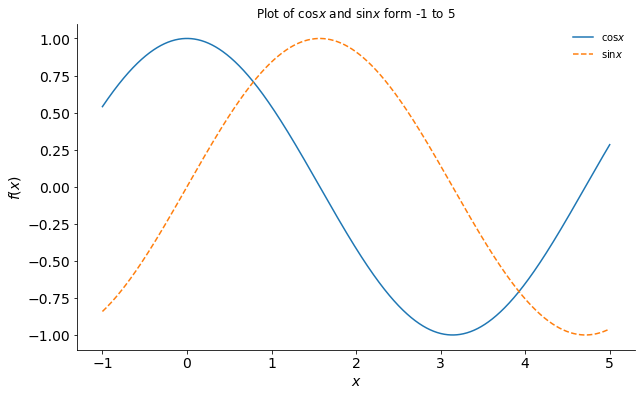

In [84]:
fig = plt.figure(figsize=(10, 6))

# Удаляем лишние границы для красоты
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.title("Plot of $\cos x$ and $\sin x$ form -1 to 5")
plt.xlabel("$x$", fontsize=14)  
plt.ylabel("$f(x)$", fontsize=14)

x = np.linspace(-1, 5, 1000)
plt.plot(x, np.cos(x), label="$\cos x$")
plt.plot(x, np.sin(x), linestyle="dashed", label="$\sin x$")
plt.legend(frameon=False)

plt.show()

### 27

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными светами и маркерами. Также укажите на графике легенду.

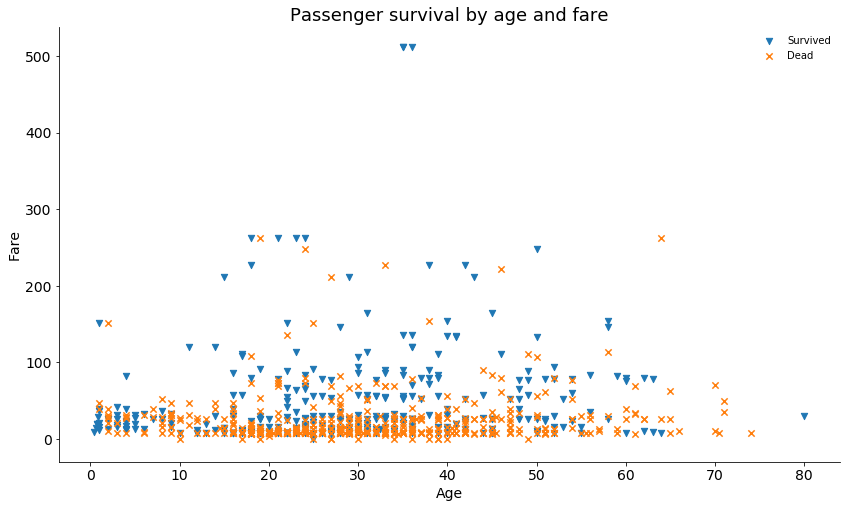

In [210]:
survived = df_2[df["Survived"] == 1]
dead = df_2[df["Survived"] == 0]
fare_survived = survived["Fare"]
age_survived = survived["Age"]
fare_dead = dead["Fare"]
age_dead = dead["Age"]

fig = plt.figure(figsize=(14, 8))

# Удаляем лишние границы для красоты
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.title("Passenger survival by age and fare", fontsize=18)
plt.xlabel("Age", fontsize=14)  
plt.ylabel("Fare", fontsize=14)

plt.scatter(age_survived, fare_survived, s=40, marker="v", label="Survived")
plt.scatter(age_dead,fare_dead, s=40, marker="x", label="Dead")

plt.legend(frameon=False)